In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [2]:
# Copy and Deep copy
df2 = pd.read_csv("50_StartUp.csv")
df = copy.deepcopy(df2)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
print(df.isnull().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [6]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
corr = df.corr()
corr

C:\Users\Heba Sherif\AppData\Local\Temp\ipykernel_18668\2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

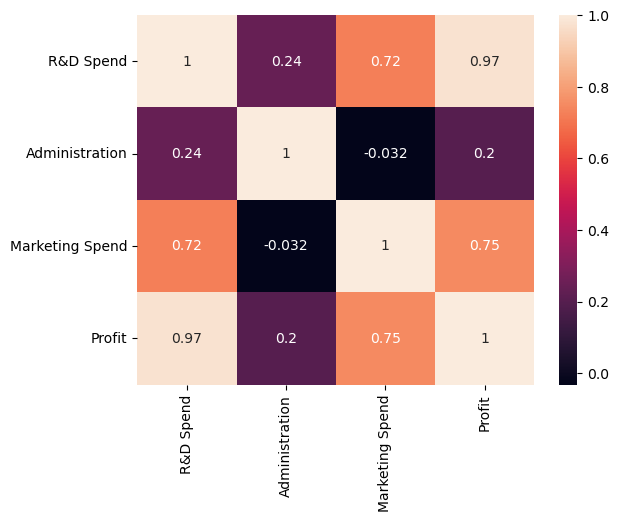

In [9]:
sns.heatmap(corr,annot=True)

<Axes: xlabel='R&D Spend', ylabel='Profit'>

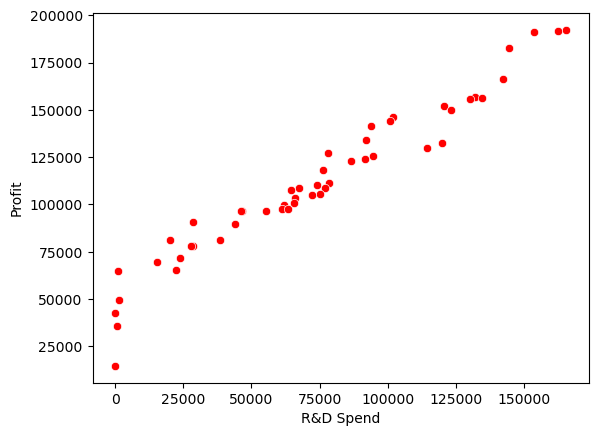

In [10]:
sns.scatterplot(x='R&D Spend',y='Profit',data=df,color='r')

array([[<Axes: title={'center': 'R&D Spend'}>,
        <Axes: title={'center': 'Administration'}>],
       [<Axes: title={'center': 'Marketing Spend'}>,
        <Axes: title={'center': 'Profit'}>]], dtype=object)

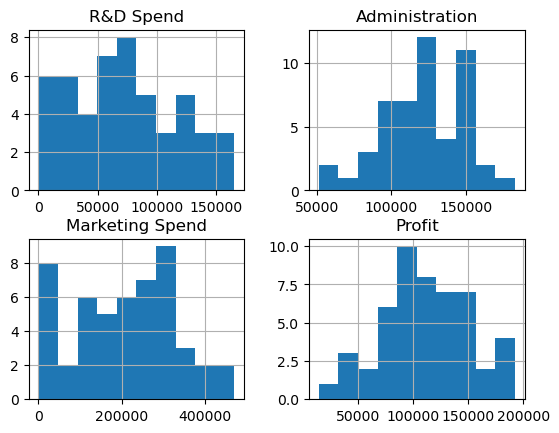

In [11]:
df.hist()

In [12]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [13]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [14]:
# Encoding

In [15]:
df_state = pd.get_dummies(df['State'],drop_first=True)
df_state

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0
5,0,1
6,0,0
7,1,0
8,0,1
9,0,0


In [16]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [17]:
df = pd.concat([df,df_state],axis=1)
df

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0
5,131876.90,99814.71,362861.36,New York,156991.12,0,1
6,134615.46,147198.87,127716.82,California,156122.51,0,0
7,130298.13,145530.06,323876.68,Florida,155752.60,1,0
8,120542.52,148718.95,311613.29,New York,152211.77,0,1
9,123334.88,108679.17,304981.62,California,149759.96,0,0


In [18]:
# Splitting

In [19]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit',
       'Florida', 'New York'],
      dtype='object')

In [23]:
df=df.drop(['State'],axis=1)

In [24]:
x = df.drop('Profit',axis =1)
y = df['Profit']
x.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [26]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(x_test)
y_pred

array([126187.39411512,  85788.82259489,  99777.0281516 ,  45706.12238325,
       127062.20722787,  51891.83884402, 109114.62977498, 100600.61123707,
        97953.99874703, 111730.57706801, 128818.49200667, 174195.35772603,
        93736.28538393, 148381.04097174, 172313.87139381])

In [28]:
MSE = mean_squared_error(y_pred,y_test)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_pred,y_test)
SCORE = r2_score(y_pred,y_test)

In [29]:
print(" The MSE: {} \n The RMSE: {} \n The MAE: {} \n The SCORE: {}".format(MSE,RMSE,MAE,SCORE))

 The MSE: 84826955.03358732 
 The RMSE: 9210.154995090328 
 The MAE: 7395.433531431916 
 The SCORE: 0.9332109195328263


In [51]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit', 'Florida',
       'New York'],
      dtype='object')

In [53]:
m = model.coef_
b = model.intercept_
R_D = int(input("Please enter your R&D Spends"))
Admin = int(input("Please enter your Administration Spends"))
Market = int(input("Please enter your Marketing Spends"))
F = int(input("Please enter Florida encode"))
N = int(input("Please enter New York encode"))

Profit = m[0]*R_D + m[1]*Admin + m[2]*Market + m[3]*F + m[4]*N + b

Please enter your R&D Spends 12000
Please enter your Administration Spends 12000
Please enter your Marketing Spends 15900
Please enter Florida encode 0
Please enter New York encode 1


In [54]:
Profit

65187.90875175756